# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [7]:
import pandas as pd

In [8]:
# 판다스를 통한 데이터 불러오기 기본 형태
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv",encoding = "utf-8") 

In [9]:
# head() = 데이터가 긴 경우에 앞부분 5개만 보여달라는 의미
CCTV_Seoul.head() 

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [10]:
CCTV_Seoul.head(10) 

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [11]:
CCTV_Seoul.tail() 

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [12]:
#리스트 형태로 나옴 = > 뽑을수 있다
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [13]:
CCTV_Seoul.columns[0]

'기관명'

In [14]:
#컬럼이름 변경 
#inplace = True (원본도 변경)
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] :'구별'}, inplace = True)

In [15]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [16]:
#엑셀 파일 열기
pop_Seoul= pd.read_excel("../data/01. Seoul_Population.xls")

In [17]:
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


In [18]:
#엑셀설정 
#자료를 읽기  시작할 행 (header)지정 / n 줄을 날리고 싶을떄 
#읽어올  엑셀의 컬럼(usecols)지정 
pop_Seoul= pd.read_excel(
    "../data/01. Seoul_Population.xls", header = 2, usecols = "B,D,G,J,N"
)

In [19]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [20]:
#컬럼이름 바꾸기 

pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0] : "구별",
        pop_Seoul.columns[1] : "인구수",
        pop_Seoul.columns[2] : "한국인",
        pop_Seoul.columns[3] : "외국인",
        pop_Seoul.columns[4] : "고령자",
    }, 
    inplace =True

)

In [21]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## pandas 기초

- Python에서 R만큼 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가는 스테로이드 맞은 엑셀로 표현함 

#### Series
- index와 value로 이루어져 있습니다.
- 한가지 데이터 타입만 가질 수 있음

In [2]:
#넘파이는 수치해석적  함수가 필요할떄 
import pandas as pd
import numpy as np

In [3]:
#삘간색은 코드실행과는 무관한 경고문구
#리스트 데이터 형태로 float형태구나 생각 가능
pd.Series()

/var/folders/n3/lzr2m1rs4sxg33yprdptz8gc0000gn/T/ipykernel_1204/3507994868.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [5]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [5]:
pd.Series([1,2,3,4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [4]:
# 데이터 형태 변경 (int -> float)
pd.Series([1,2,3,4], dtype=float)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [6]:
pd.Series([1,2,3,4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [7]:
pd.Series(np.array([1,2,3]))

0    1
1    2
2    3
dtype: int64

In [8]:
pd.Series({"key": "value"})

key    value
dtype: object

In [15]:
#데이터 전체를 문자열로 인식 중 
data = pd.Series([1,2,3,4,"5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [16]:
#짝수를 찾고 싶다
#string때문에 오류발생확인 가능
data % 2

TypeError: not all arguments converted during string formatting

In [9]:
data = pd.Series([1,2,3,4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [10]:
data % 2

0    1
1    0
2    1
3    0
dtype: int64

#### 날짜데이터

In [29]:
dates= pd.date_range("20210101",periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

### Data Frame
- pd.Series()
    - index,value
- pd.DataFrame() 
    - index,value,column

In [30]:
# 표준정규분포에서 샘플링한 난수 생성, 평균 0 표준편차 1인 
data = np.random.randn(6,4)
data

array([[-0.85639342,  2.19442511,  0.81750177, -2.68380507],
       [-0.13812838, -1.63883099,  1.70329785, -1.03278767],
       [ 0.11777757,  0.46872196,  0.8516849 , -0.69541398],
       [-1.17091397,  0.09428375,  0.2029886 , -0.28292401],
       [-0.15221688, -0.1536516 , -1.57031624, -0.94924883],
       [ 0.73995892,  0.54522619, -0.37650205, -0.86327778]])

In [31]:
df=pd.DataFrame(data,index= dates, columns=['A','B','C','D'])
df

,A,B,C,D
2021-01-01,-0.856393,2.194425,0.817502,-2.683805
2021-01-02,-0.138128,-1.638831,1.703298,-1.032788
2021-01-03,0.117778,0.468722,0.851685,-0.695414
2021-01-04,-1.170914,0.094284,0.202989,-0.282924
2021-01-05,-0.152217,-0.153652,-1.570316,-0.949249
2021-01-06,0.739959,0.545226,-0.376502,-0.863278


### 데이터 프레임 정보 탐색

- df .head()

In [16]:
df.head() #디폴트가 5개

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993


-df.tail()

In [17]:
df.tail()

,A,B,C,D
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


-df.index

In [18]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[-1.14315708,  0.30527516,  0.43171187, -2.09831115],
       [ 1.71958409,  0.9443515 ,  0.72756403,  0.24923888],
       [ 0.64368597,  0.45347365,  0.05295578, -0.64742153],
       [-0.07240387, -0.89741653, -0.03565401, -0.12925236],
       [-2.08668537,  0.99699509, -1.35746434, -2.79699251],
       [-1.5817655 ,  0.72979184, -1.24104232,  0.95511324]])

-df.info() : 데이터 프레임의  기본정보 확인 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


-df.describe() : 데이터 프레임의 기술통계정보 확인 

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.420124,0.422078,-0.236988,-0.744604
std,1.447796,0.700526,0.867838,1.435945
min,-2.086685,-0.897417,-1.357464,-2.796993
25%,-1.472113,0.342325,-0.939695,-1.735589
50%,-0.607780,0.591633,0.008651,-0.388337
75%,0.464664,0.890712,0.337023,0.154616
max,1.719584,0.996995,0.727564,0.955113


### 데이터 정렬 

- soft_values()
- 특정 칼럼(열)을 기준으로 데이터 정렬  

In [23]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [24]:
#오룸차순이 디폴트
df.sort_values(by='B')

,A,B,C,D
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-06,-1.581766,0.729792,-1.241042,0.955113
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993


In [25]:
#내림차순
df.sort_values(by='B' , ascending =False)

,A,B,C,D
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-06,-1.581766,0.729792,-1.241042,0.955113
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252


In [26]:
#원본 데이터도 정렬된것으로 바꾸고 싶으면 inplace = True 적용
df.sort_values(by='B' , ascending =False, inplace=True)

In [28]:
df

,A,B,C,D
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-06,-1.581766,0.729792,-1.241042,0.955113
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252


### 데이터 선택

In [29]:
df

,A,B,C,D
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-06,-1.581766,0.729792,-1.241042,0.955113
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252


In [30]:
# 한개 컬럼 선택
df['A']

2021-01-05   -2.086685
2021-01-02    1.719584
2021-01-06   -1.581766
2021-01-03    0.643686
2021-01-01   -1.143157
2021-01-04   -0.072404
Name: A, dtype: float64

In [31]:
type(df['A'])

pandas.core.series.Series

In [33]:
df.A

2021-01-05   -2.086685
2021-01-02    1.719584
2021-01-06   -1.581766
2021-01-03    0.643686
2021-01-01   -1.143157
2021-01-04   -0.072404
Name: A, dtype: float64

In [34]:
df=pd.DataFrame(data,index= dates, columns=['A','B','C','4'])
df

,A,B,C,4
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [36]:
df.4

SyntaxError: invalid syntax (986429789.py, line 1)

In [33]:
## 두개 이상의 컬럼
df['A','B']

KeyError: ('A', 'B')

In [38]:
## 두개 이상의 컬럼 리스트 형태로 해야함 
df[['A','B']]

,A,B
2021-01-01,-1.143157,0.305275
2021-01-02,1.719584,0.944351
2021-01-03,0.643686,0.453474
2021-01-04,-0.072404,-0.897417
2021-01-05,-2.086685,0.996995
2021-01-06,-1.581766,0.729792


### off set index
- [n:m] : n부터 m-1 까지 
- 인덱스나 컬럼의 이름으로 slice 하는 경우는 끝을 포함합니다.

In [42]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [43]:
df[0:3]

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422


- loc : location
- index 이름으로 특정 행,열 을 선택합니다.

In [44]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [45]:
#인덱스는 전부 다 가져오고 컬럼은 A,B만 가져와라 
df.loc[:,["A","B"]]

,A,B
2021-01-01,-1.143157,0.305275
2021-01-02,1.719584,0.944351
2021-01-03,0.643686,0.453474
2021-01-04,-0.072404,-0.897417
2021-01-05,-2.086685,0.996995
2021-01-06,-1.581766,0.729792


In [46]:
df.loc["20210102":"20210104",['A','D']]

,A,D
2021-01-02,1.719584,0.249239
2021-01-03,0.643686,-0.647422
2021-01-04,-0.072404,-0.129252


In [47]:
df.loc["20210102":"20210104",'A':'D']

,A,B,C,D
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252


In [48]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [51]:
df.loc["20210102",['A','B']]

A    1.719584
B    0.944351
Name: 2021-01-02 00:00:00, dtype: float64

- iloc :inter location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [52]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [53]:
df.iloc[3]

A   -0.072404
B   -0.897417
C   -0.035654
D   -0.129252
Name: 2021-01-04 00:00:00, dtype: float64

In [54]:
#앞에가 행 뒤에가 열 
df.iloc[3,2]

-0.035654012912510996

In [55]:
df.iloc[3:5,0:2]

,A,B
2021-01-04,-0.072404,-0.897417
2021-01-05,-2.086685,0.996995


In [57]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [56]:
df.iloc[[1,2,4],[0,2]]

,A,C
2021-01-02,1.719584,0.727564
2021-01-03,0.643686,0.052956
2021-01-05,-2.086685,-1.357464


In [58]:
df.iloc[:, 1:3]

,B,C
2021-01-01,0.305275,0.431712
2021-01-02,0.944351,0.727564
2021-01-03,0.453474,0.052956
2021-01-04,-0.897417,-0.035654
2021-01-05,0.996995,-1.357464
2021-01-06,0.729792,-1.241042


### condition

In [59]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [62]:
#A컬럼에서 양수만 선택

df["A"] > 0

2021-01-01    False
2021-01-02     True
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: A, dtype: bool

In [64]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [63]:
df[df["A"] > 0]

,A,B,C,D
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422


In [65]:
# 위의 경우와는 다르게 df 전체를 할 경우 전체 데이터가 표시
df[df>0]

,A,B,C,D
2021-01-01,NaN,0.305275,0.431712,NaN
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,NaN
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,NaN,0.996995,NaN,NaN
2021-01-06,NaN,0.729792,NaN,0.955113


-NaN = not a number

### 컬럼 추가
- 기존 컬럼이 없으면 추가
- 기존 컬럼이 있으면 수정

In [66]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [68]:
df["E"]=['one','one','two','three','four','six']
df

,A,B,C,D,E
2021-01-01,-1.143157,0.305275,0.431712,-2.098311,one
2021-01-02,1.719584,0.944351,0.727564,0.249239,one
2021-01-03,0.643686,0.453474,0.052956,-0.647422,two
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252,three
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993,four
2021-01-06,-1.581766,0.729792,-1.241042,0.955113,six


-isin() 
- 특정 요소가 있는지 확인하는 메소드

In [69]:
df["E"].isin(["two"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [70]:
df["E"].isin(["two","five"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [71]:
#true로 반환된 값만 반환을 해줌
df[df["E"].isin(["two","five"])]

,A,B,C,D,E
2021-01-03,0.643686,0.453474,0.052956,-0.647422,two


### 특정컬럼 제거
- del
- drop

In [72]:
df

,A,B,C,D,E
2021-01-01,-1.143157,0.305275,0.431712,-2.098311,one
2021-01-02,1.719584,0.944351,0.727564,0.249239,one
2021-01-03,0.643686,0.453474,0.052956,-0.647422,two
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252,three
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993,four
2021-01-06,-1.581766,0.729792,-1.241042,0.955113,six


In [73]:
del df["E"]
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [74]:
#axis =1 세로
#axis =0 가로
df.drop(["D"],axis =1)

,A,B,C
2021-01-01,-1.143157,0.305275,0.431712
2021-01-02,1.719584,0.944351,0.727564
2021-01-03,0.643686,0.453474,0.052956
2021-01-04,-0.072404,-0.897417,-0.035654
2021-01-05,-2.086685,0.996995,-1.357464
2021-01-06,-1.581766,0.729792,-1.241042


In [77]:
df.drop(["20210104"])

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


### apply()

In [78]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [79]:
df["A"].apply("sum")

-2.520741761298208

In [80]:
df["A"].apply("mean")

-0.4201236268830347

In [81]:
df["A"].apply("min")

-2.0866853736514117

In [82]:
df["A"].apply("sum"),df["A"].apply("max")

(-2.520741761298208, 1.7195840899082824)

In [83]:
df[["A","D"]].apply("sum")

A   -2.520742
D   -4.467625
dtype: float64

In [84]:
df["A"].apply(np.sum)

2021-01-01   -1.143157
2021-01-02    1.719584
2021-01-03    0.643686
2021-01-04   -0.072404
2021-01-05   -2.086685
2021-01-06   -1.581766
Freq: D, Name: A, dtype: float64

In [85]:
df["A"].apply(np.std)

2021-01-01    0.0
2021-01-02    0.0
2021-01-03    0.0
2021-01-04    0.0
2021-01-05    0.0
2021-01-06    0.0
Freq: D, Name: A, dtype: float64

In [86]:
df.apply(np.sum)

A   -2.520742
B    2.532471
C   -1.421929
D   -4.467625
dtype: float64

In [87]:
df

,A,B,C,D
2021-01-01,-1.143157,0.305275,0.431712,-2.098311
2021-01-02,1.719584,0.944351,0.727564,0.249239
2021-01-03,0.643686,0.453474,0.052956,-0.647422
2021-01-04,-0.072404,-0.897417,-0.035654,-0.129252
2021-01-05,-2.086685,0.996995,-1.357464,-2.796993
2021-01-06,-1.581766,0.729792,-1.241042,0.955113


In [88]:
def plusminus(num):
    return "plus" if num>0 else "minus"
    

In [89]:
df["A"].apply(plusminus)

2021-01-01    minus
2021-01-02     plus
2021-01-03     plus
2021-01-04    minus
2021-01-05    minus
2021-01-06    minus
Freq: D, Name: A, dtype: object

In [91]:
df["A"].apply(lambda num: "plus" if num>0 else "minus")

2021-01-01    minus
2021-01-02     plus
2021-01-03     plus
2021-01-04    minus
2021-01-05    minus
2021-01-06    minus
Freq: D, Name: A, dtype: object

---

## cctv 데이터 훑어보기

In [16]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [17]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5) 
#cctv를 가장 적게 보유한 구

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [18]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5) 
#cctv를 가장 많이 보유한 구

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [19]:
# 최근 3년간 그 전 보유한 갯수 대비  cctv를 많이 설치한 구는 ?

CCTV_Seoul["최근증가율"] =(
    (CCTV_Seoul["2016년"]+CCTV_Seoul["2015년"]+CCTV_Seoul["2014년"])
    / CCTV_Seoul["2013년도 이전"]
    *100
)
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5) 


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구현황 데이터 훑어보기

- 단순히 구별 CCTV 갯수로는 한계가 존재 인구현황과 함께 비교 필요

In [20]:
# 서울시 인구 데이터 확인
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [21]:
# 0번행의 합계 데이터는 필요 없음
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [23]:
# unique 조사 , 데이터 양이 많아지면 초반검증(눈으로)용으로 사용
#어떤 데이터들이 나타났는지 중복없이 보여줌 
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [24]:
len(pop_Seoul["구별"].unique())

25

In [25]:
pop_Seoul["외국인 비율"] = pop_Seoul["외국인"]/pop_Seoul["인구수"] *100
pop_Seoul["고령자 비율"] = pop_Seoul["고령자"]/pop_Seoul["인구수"] *100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [26]:
# 인구수가 많은 구는?
pop_Seoul.sort_values(by="인구수", ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [27]:
# 외국인이 많은 구는?
pop_Seoul.sort_values(by="외국인", ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [28]:
# 외국인 비율이 높은 구는?
pop_Seoul.sort_values(by="외국인 비율", ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [29]:
# 고령자가 많은 구는?
pop_Seoul.sort_values(by="고령자", ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [30]:
# 고령자 비율이 많은 구는?
pop_Seoul.sort_values(by="고령자 비율", ascending=False).head(5) 

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


- CCTV 데이터로 어느 구가 CCTV가 많은지... 인구현황 데이터로 각 구별 순위 확인... 이런걸로는 뭐 얻을게 없다... 두 데이터를 같이 비교하고 관계도 조사해보자...

## 4. 두 데이터 합치기 

---

#### pandas에서 데이터 프레임 합치는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [22]:
pd.merge(left ,right)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [3]:
pd.DataFrame({
    "key":["K0","K4","K2","K3"],
})

,key
0,K0
1,K4
2,K2
3,K3


In [23]:

#딕셔너리 안의 리스트 형태

left=pd.DataFrame({
    "key":["K0","K4","K2","K3"],
    "A" : ["A0","A1","A2","A3"],
    "B": ["B0","B1","B2","B3"]
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [24]:
#리스트 안의 딕셔너리 형태 

right= pd.DataFrame([
    {"key":"K0","C":"C0","D":"D0"},
    {"key":"K1","C":"C1","D":"D1"},
    {"key":"K2","C":"C2","D":"D2"},
    {"key":"K3","C":"C3","D":"D3"},
])


right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합
- 기준이 되는 컬럼이나 인덱스를 키값이라고 합니다.
- 기준이 되는 키값은 두 데이터 프레임 안에 모두 포함되어 있어야 합니다.

In [26]:
pd.merge(left,right,on = "key")


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [25]:
pd.merge(left,right,how="left" ,on = "key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [27]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [28]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [32]:
pd.merge(left, right ,how="right" ,on = "key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [33]:
#inner가 디폴드값 
pd.merge(left, right ,how="outer" ,on = "key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

#### pandas 데이터 합치기 (실습)

In [31]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [32]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [33]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [34]:
# 필요 없는 컬럼 제거 

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

data_result.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set index()
- 선택한 컬럼을 데이터 프레임 인덱스로 지정

In [40]:
'''•Pandas Index 지정
•데이터를 정리하는 과정에서 index를 재지정할 때가 있다 
•여기서는 unique한 데이터인 구별로 index를 잡자 
•index를 재지정하는 명령은 set_index 이다'''

data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation의 약자
- 상관계수 0.2이상 데이터 비교

In [41]:
'''•데이터의 관계를 찾을 때, 최소한의 근거가 있어야 해당 데이터를 비교하는 의미가 존재 
•상관계수를 조사해서 0.2 이상의 데이터를 비교하는 것은 의미가 있다'''
# •CCTV 전체 수(소계)와 가장 상관관계가 있는 데이터는 인구수이다

data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인 비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자 비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [42]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인 비율  25 non-null     float64
 7   고령자 비율  25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [ ]:
# 그러므로 구별 인구대비 CCTV 현황을 분석해서 상대적으로 CCTV가 적거나 많은 구를 찾는 것은 의미를 가진다

In [ ]:
# CCTV 비율을 만들어 CCTV 비율이 높은 구를 보자

In [43]:
data_result["CCTV비율"] = data_result["소계"]/data_result["인구수"]
data_result["CCTV비율"] = data_result["CCTV비율"] *100
data_result.sort_values(by="CCTV비율", ascending=False).head(5) 

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [112]:
# CCTV 비율을 만들어 CCTV 비율이 낮은 구를 보자
data_result.sort_values(by="CCTV비율", ascending=True).head(5) 

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

# matplotlib 기초

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='Arial Unicode MS')

In [53]:
plt.figure(figsize=(10,6))
plt.show()

<Figure size 720x432 with 0 Axes>

[]

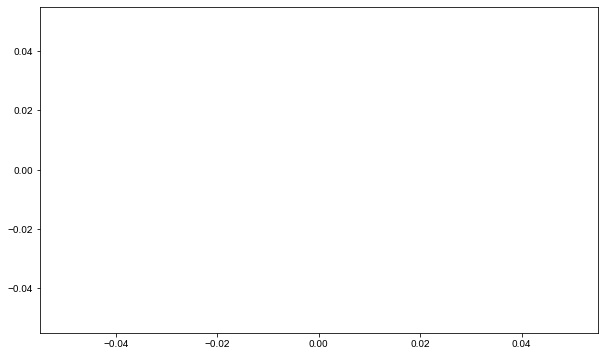

In [49]:
plt.figure(figsize=(10,6))
plt.plot()

- matplotlib 그래프 기본형태

- plt.figure(figsize=(10,6))
- plt.plot(x,y)
- plt.show()

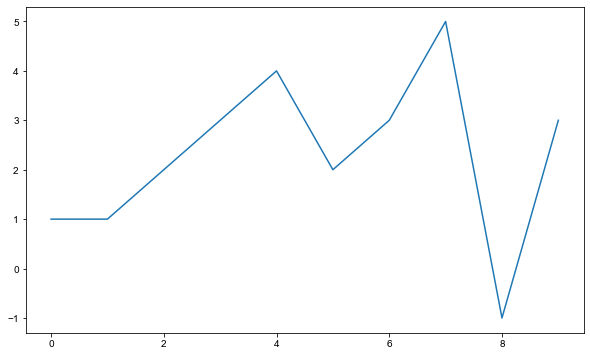

In [54]:
plt.figure(figsize=(10,6))
plt.plot([0,1,2,3,4,5,6,7,8,9],[1,1,2,3,4,2,3,5,-1,3])
plt.show()

### 예제 1. 그래프 기초

#### 삼각함수 그리기 
- np.arange(a,b,s) : a부터 b 까지 s 간격으로 
- np.sin(value)

In [62]:
import numpy as np

t= np.arange(0,12,0.01)
y= np.sin(t)

<function matplotlib.pyplot.show(close=None, block=None)>

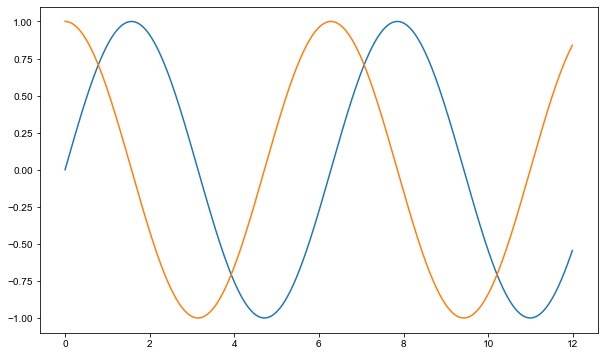

In [64]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t,np.cos(t))
plt.show

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x,y축 제목 추가 
- 4. 주황색,파란색 선 데이터 의미 구분 

In [76]:

def drawgraph():


    plt.figure(figsize=(10,6))
    plt.plot(t,np.sin(t))
    plt.plot(t,np.cos(t))
    plt.grid(True) # 격자무늬
    plt.legend(labels=["sin","cos"], loc="upper left") #범례 ,loc 범례 위치 변경
    plt.title("Example Of sinwave") # 그래프 제목 추가 
    plt.xlabel("time") # x축 제목 추가 
    plt.ylabel("Amlitude")
    plt.show
    


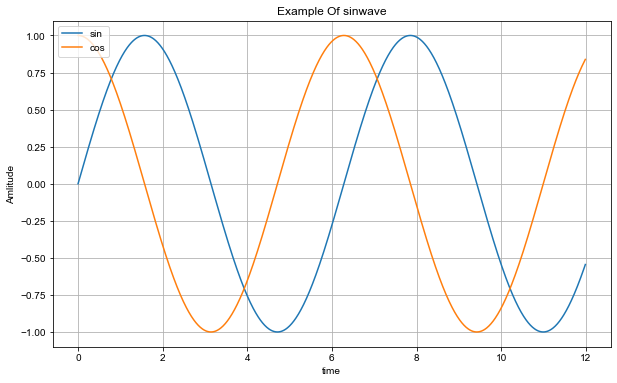

In [77]:
drawgraph()

### 2. 그래프 커스텀

In [79]:
t= np.arange(0,5,0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

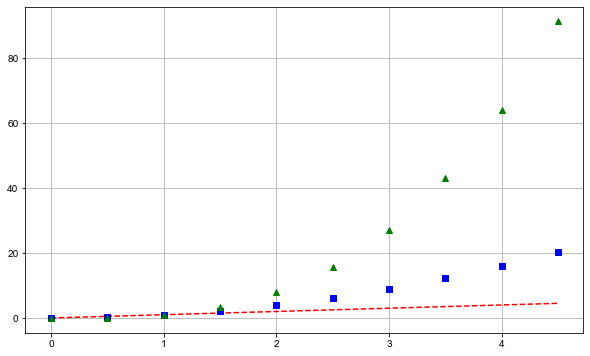

In [83]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(t,t,"r--") #red--
plt.plot(t,t**2,"bs")
plt.plot(t,t**3,"g^")#화살표 모양
plt.show()

In [85]:
t=list(range(0,7))
t
y=[1,4,5,8,9,5,3]

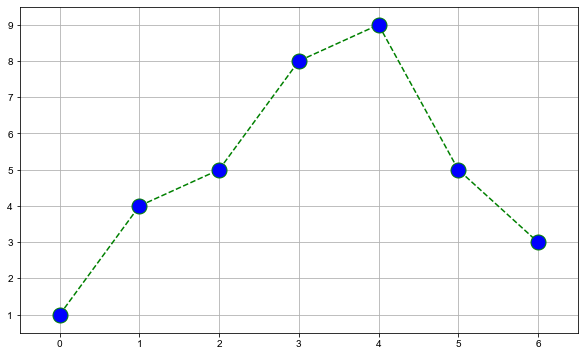

In [92]:
def drawgraph2():
    
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.plot(
        t,
        y,
        color="green",
        linestyle= "dashed",
        marker="o",
        markerfacecolor="blue",
        markersize=15,
    ) 

    plt.xlim([-0.5,6.5])
    plt.ylim([0.5,9.5])
    plt.show()

drawgraph2()

### 예제 3. scatter plot

In [93]:
t= np.array(range(0,10))
t

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
y= [9,8,7,9,8,3,2,4,3,4]

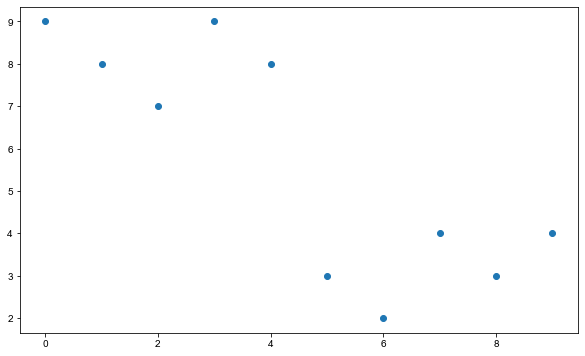

In [96]:
def drawgraph3():

    plt.figure(figsize=(20,6))
    plt.scatter(t,y)
    plt.show()
    
drawgraph3()

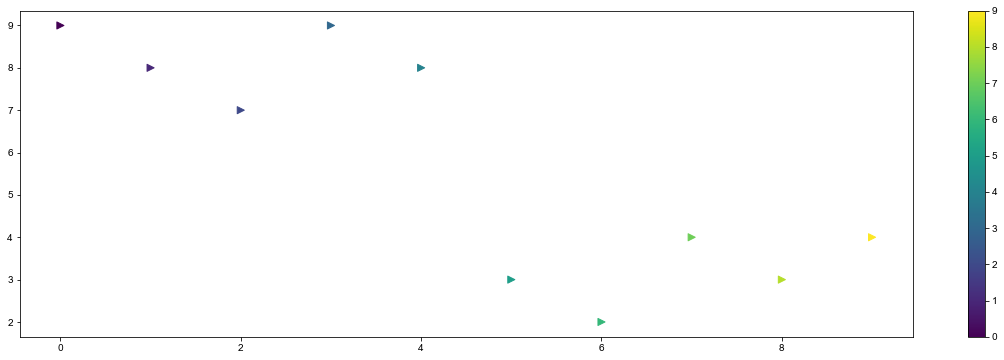

In [97]:
colormap = t 

def drawgraph3():

    plt.figure(figsize=(20,6))
    plt.scatter(t,y,s=50,c=colormap,marker =">")
    plt.colorbar()
    plt.show()
    
drawgraph3()

### 예제 4.  pandas에서  plot 그리기
- matplotlib 을 가져와서 사용

In [113]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='Arial Unicode MS')

In [114]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


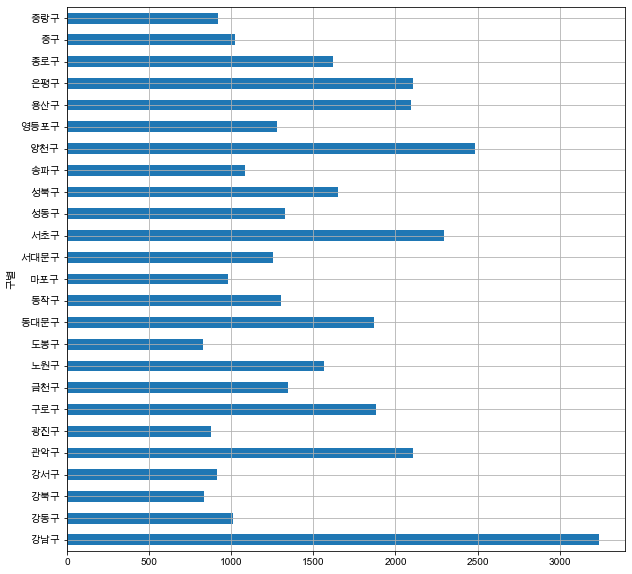

In [115]:
#•Pandas DataFrame은 데이터 변수에서 바로 plot() 명령을 사용할 수 있다 
#•그리고 데이터(컬럼)가 많은 경우 정렬한 후 그리는 것이 효과적일 때가 많다
data_result["소계"].plot(kind="barh", grid = True, figsize=(10,10));

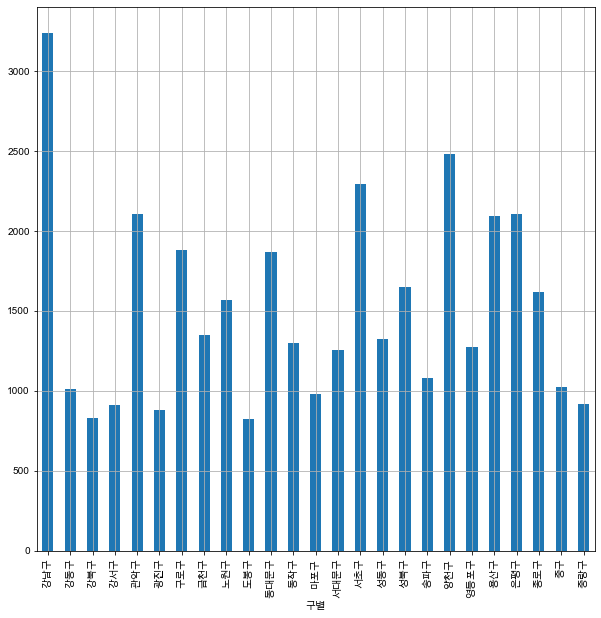

In [98]:
data_result["소계"].plot(kind="bar", grid = True, figsize=(10,10));

---

## 5. 데이터 시각화

In [99]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [116]:
#•강남구가 CCTV가 제일 많네... 
#•그 이외의 정보는 잘 안 보인다

In [100]:
def drawGraph4():
    data_result["소계"].sort_values().plot(
        kind="barh",
        grid=True,
        title="가장 CCTV가 많은 구",
        figsize=(10,10)
    )

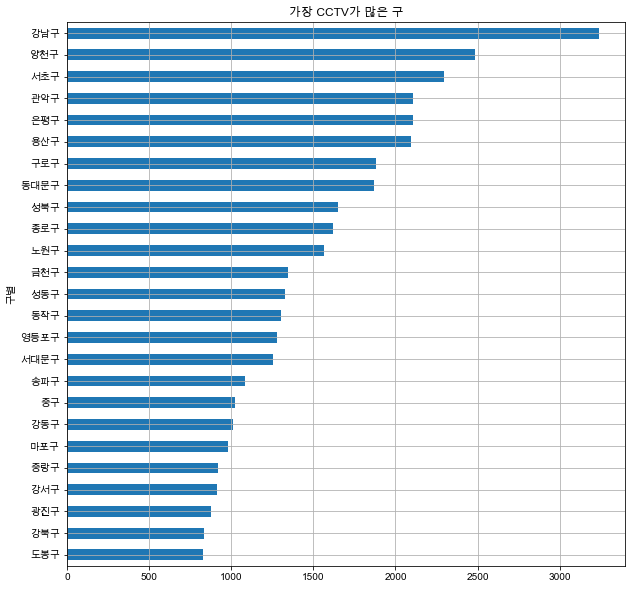

In [101]:
 drawGraph4()

In [102]:
def drawGraph5():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh",
        grid=True,
        title="가장 CCTV가 많은 구",
        figsize=(10,10)
    )

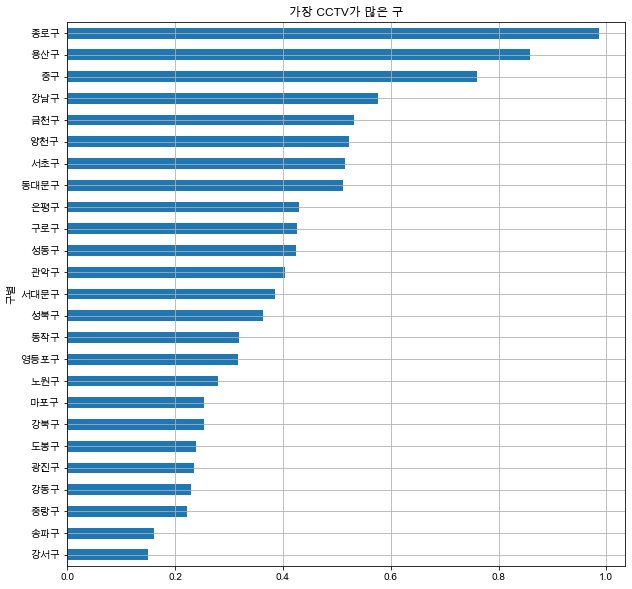

In [103]:
 drawGraph5()

### 6.데이터 경향 파악 

In [109]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [110]:
#인구수와 소계컬럼으로 scatter plot 그리기 

def drawGraph6():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"], s=50 )
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()
    

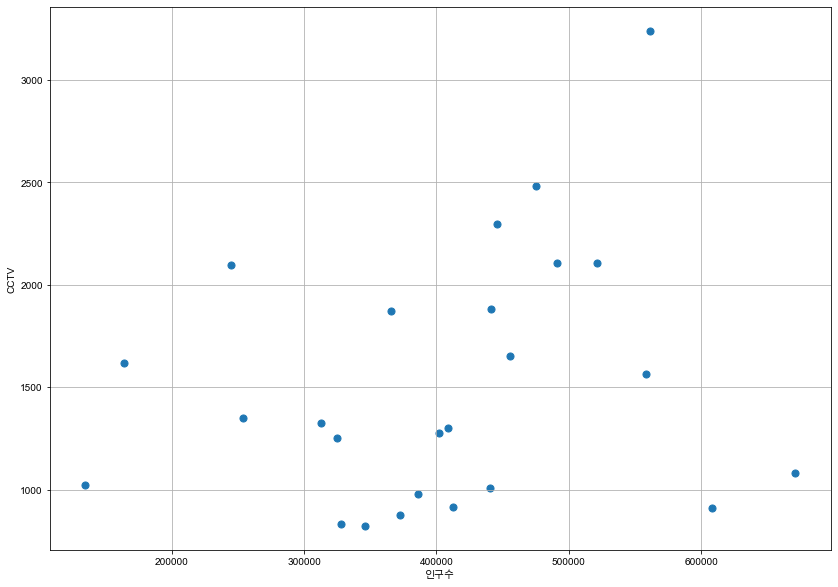

In [106]:
 drawGraph6()

In [111]:
### Numpy를 이용한 1차 직선 만들기

In [113]:
import numpy as np

fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [114]:
f1 = np.poly1d(fp1)

In [115]:
# 인구 400000인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수를 알고 싶다면?
f1(400000)

1509.7809252413338

In [116]:
# 경향선을 그리기 위해 X 데이터 생성
# np.linspace(a, b, n) : a부터 b까지 n개의 등간격 데이터 생성

fx = np.linspace(100000,700000,100)


In [117]:
def drawGraph7():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"], s=50 )
    plt.plot(fx,f1(fx),ls="dashed",lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()

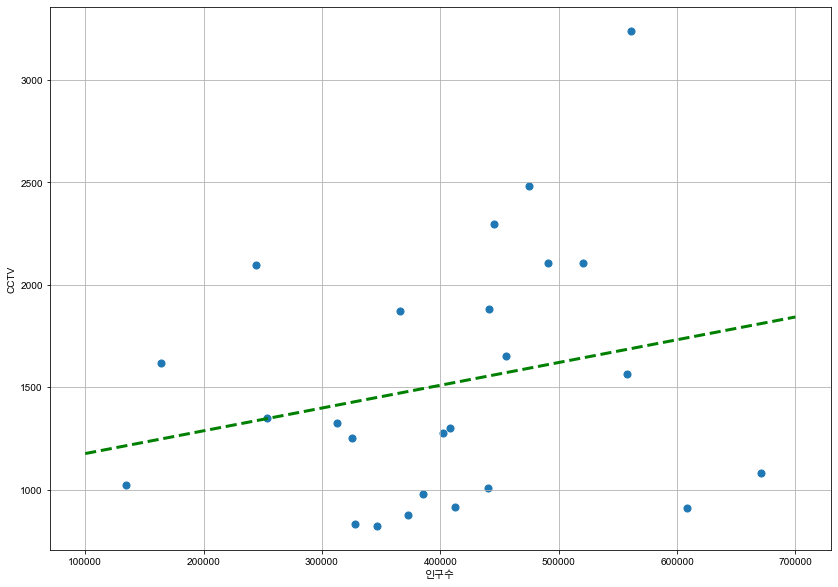

In [118]:
# 데이터 경향 직선 표현
drawGraph7()

## 7.  강조하고 싶은 데이터 시각화

### 그래프 다듬기
### 경향과의  오차 만들기
- 경향 (트랜드)과의 오차를 만들자
- 경향은 f1 함수에  해당인구를  입력 
- f1(data_result["인구수"])_

In [120]:
fp1= np.polyfit(data_result["인구수"],data_result["소계"],1)

f1= np.poly1d(fp1)
fx= np. linspace(100000,700000,100)

In [121]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352


In [122]:
data_result["오차"]= data_result["소계"]- f1(data_result["인구수"])

In [123]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [ ]:
# 경향과 비교해서 데이터의 오차가 크게 나는 데이터를 계산

In [130]:
df_sort_f = data_result.sort_values(by="오차",ascending=False) #내림차순
df_sort_t= data_result.sort_values(by="오차",ascending=True) #오름차순

In [131]:
# 경향 대비 CCTV를 많이 가진 구
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [132]:
# 경향 대비 CCTV를 적게 가진 구
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [148]:
from matplotlib.colors import ListedColormap

# color map을 사용자 정의 (user define)로 세팅
color_step =["#e74c3c","#2ecc71","#95a9a6","#2ecc71","#3498db","#3498db"]
my_camp= ListedColormap(color_step)

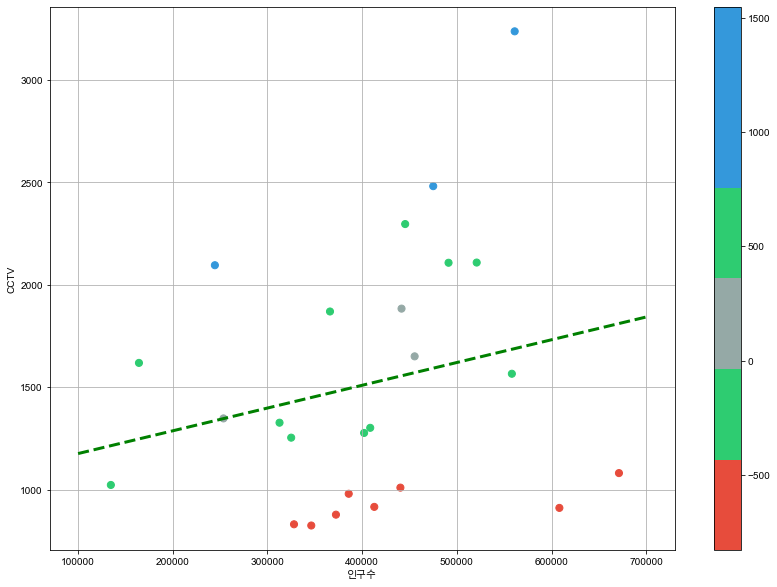

In [152]:
def drawGraph7():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"], s=50 ,c= data_result["오차"],cmap=my_camp)
    plt.plot(fx,f1(fx),ls="dashed",lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()

drawGraph7()

In [154]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [155]:
data_result["인구수"][0]

561052

In [156]:
data_result["소계"][0]

3238

In [157]:
data_result.index[0]

'강남구'

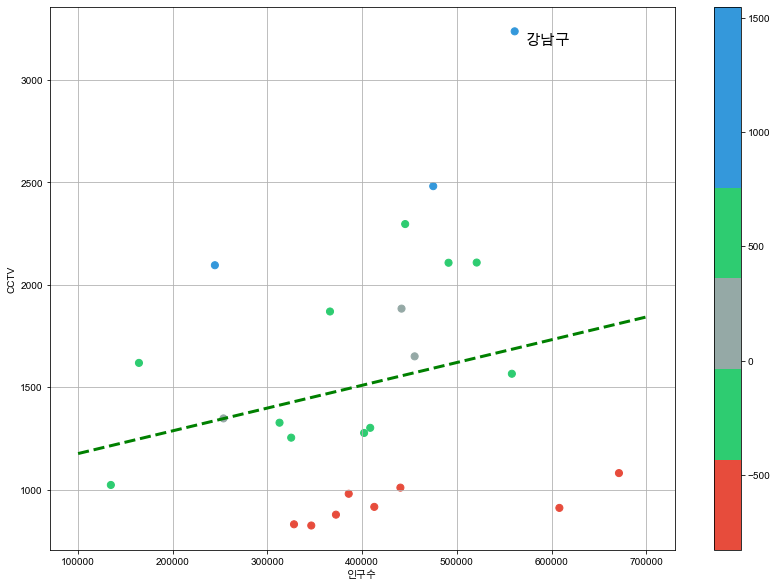

In [160]:
def drawGraph7():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"], s=50 ,c= data_result["오차"],cmap=my_camp)
    plt.plot(fx,f1(fx),ls="dashed",lw=3, color="g")
    plt.text(df_sort_f["인구수"][0]*1.02,df_sort_f["소계"][0]*0.98,df_sort_f.index[0],fontsize=15)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()

drawGraph7()

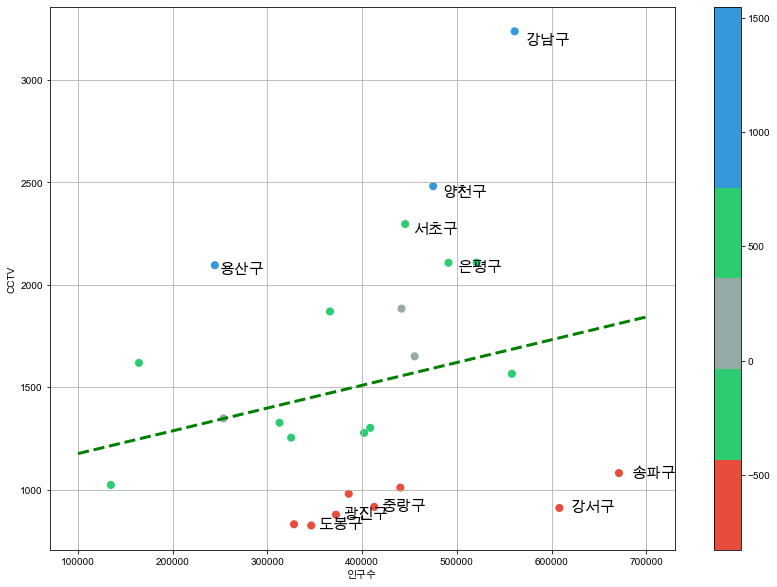

In [162]:
def drawGraph7():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"], s=50 ,c= data_result["오차"],cmap=my_camp)
    plt.plot(fx,f1(fx),ls="dashed",lw=3, color="g")
    
    for n in range(5):
    #상위 5개     
     plt.text(
         df_sort_f["인구수"][n] * 1.02, #x좌표
         df_sort_f["소계"][n] * 0.98, #y좌표
         df_sort_f.index[n],
         fontsize=15,
     )
    #하위 5개 
     plt.text(
         df_sort_t["인구수"][n] * 1.02,
         df_sort_t["소계"][n] * 0.98,
         df_sort_t.index[n],
         fontsize=15,
    )
    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()

drawGraph7()

In [1]:
data_result.to_csv("../data/01. CCTV_result.csv", sep =",",encoding='utf-8') 

NameError: name 'data_result' is not defined

In [ ]:
print